In [32]:
from keras.datasets import imdb
from keras import models, layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17473536/17464789 [==============================] - 3s 0us/step


In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])


1654784/1641221 [==============================] - 0s 0us/step


In [5]:
decoded_review = ''.join([reverse_word_index.get(i-3,'?') for i in train_data[1]])

In [6]:
decoded_review

u"?bighairbigboobsbadmusicandagiantsafetypinthesearethewordstobestdescribethisterriblemovieilovecheesyhorrormoviesandi'veseenhundredsbutthishadgottobeonoftheworstevermadetheplotispaperthinandridiculoustheactingisanabominationthescriptiscompletelylaughablethebestistheendshowdownwiththecopandhowheworkedoutwhothekillerisit'sjustsodamnterriblywrittentheclothesaresickeningandfunnyinequal?thehairisbiglotsofboobs?menwearthosecut?shirtsthatshowofftheir?sickeningthatmenactuallyworethemandthemusicisjust?trashthatplaysoverandoveragaininalmosteveryscenethereistrashymusicboobsand?takingawaybodiesandthegymstilldoesn'tclosefor?alljokingasidethisisatrulybadfilmwhoseonlycharmistolookbackonthedisasterthatwasthe80'sandhaveagoodoldlaughathowbadeverythingwasbackthen"

In [11]:
def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences): 
        results[i, sequence] = 1
    return results 

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [17]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [22]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [25]:
history = model.fit(partial_x_train, 
                   partial_y_train, 
                   epochs=20, 
                   batch_size=512, 
                   validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 283us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3086 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8831
Epoch 5/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 140us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3165 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - 

In [30]:
history_dict = history.history 
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 20 + 1)

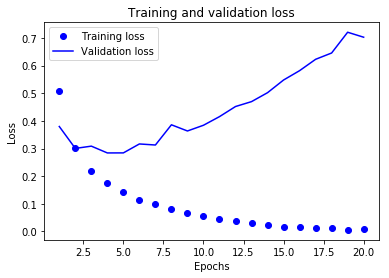

In [36]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

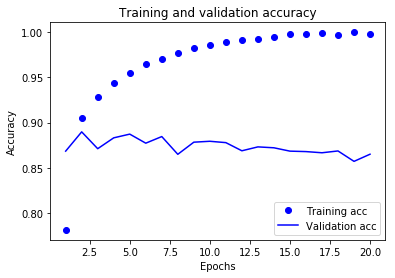

In [38]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()